(32561, 124) (32561, 1)
(16281, 124) (16281, 1)


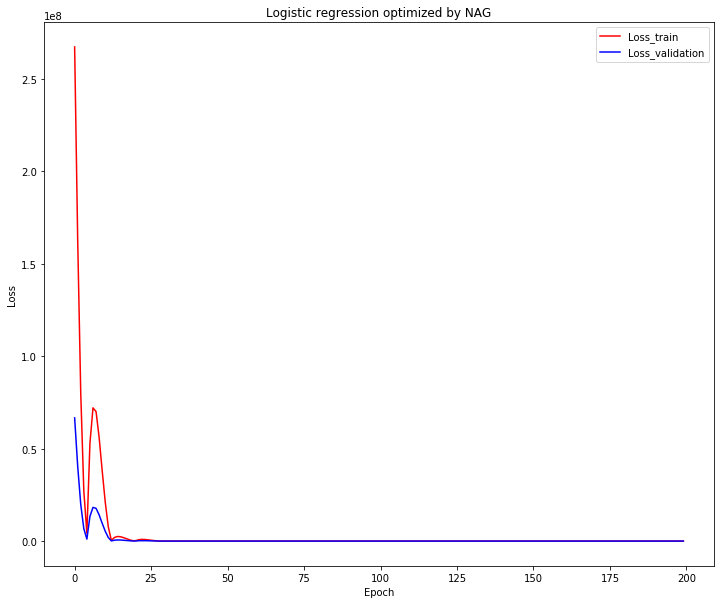

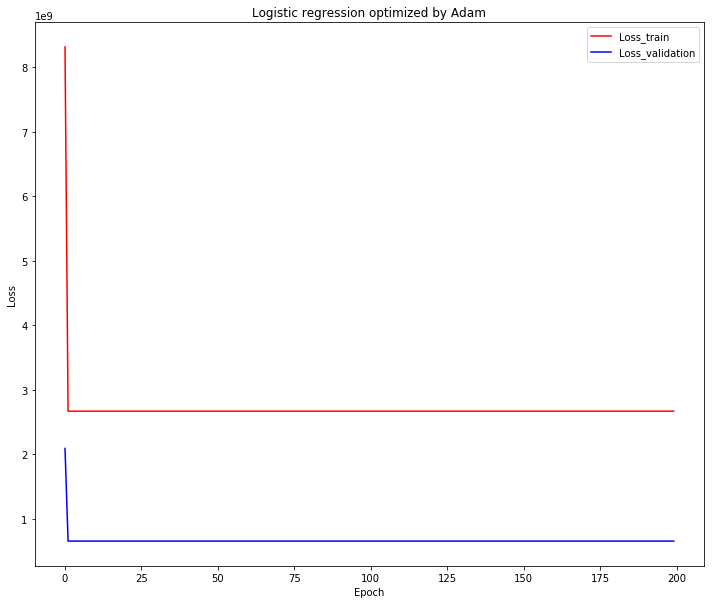

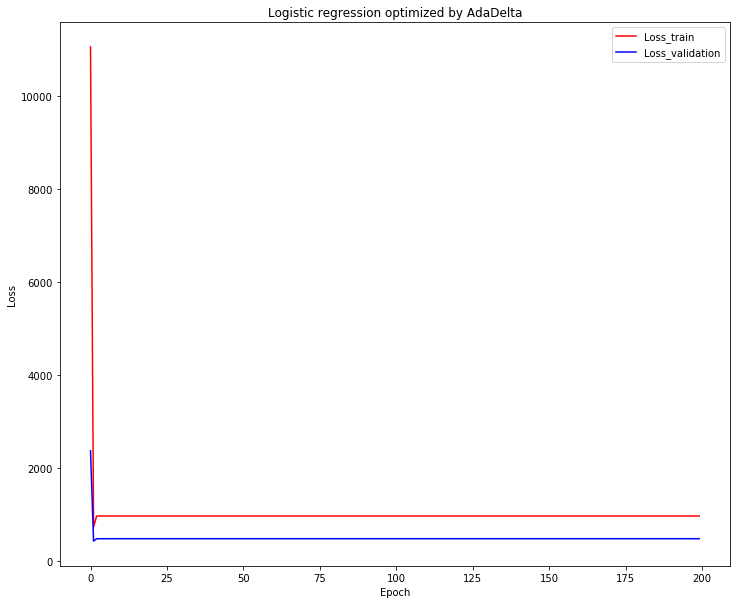

NameError: global name 'c' is not defined

In [3]:
# %load regressionlab2.py
"""
Created on Fri Dec 15 02:14:38 2017

@author: lzd-002
"""

from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt

def read_date(fileName):
    data=load_svmlight_file(fileName)
    return data[0],data[1]

path_train="/home/lrl/Downloads/a9a"
path_test="/home/lrl/Downloads/a9a.t"
x_train,y_train=load_svmlight_file(path_train)
x_train=x_train.toarray()
x_test,y_test=load_svmlight_file(path_test)
x_test=x_test.toarray()

column=np.zeros((x_test.shape[0]))
x_test=np.column_stack((x_test,column))

column_train=np.ones((x_train.shape[0]))
column_test=np.ones((x_test.shape[0]))
x_train=np.column_stack((x_train,column_train))
m,n=np.shape(x_train)
y_train=y_train.reshape((m,1))
x_test=np.column_stack((x_test,column_test))
m_train,n_train=np.shape(x_test)
y_test=y_test.reshape((m_train,1))

print x_train.shape,y_train.shape
print x_test.shape,y_test.shape

def SVMgradient(x,y,w,eta,c):
#    sigmoid=1/(1+np.exp(-np.dot(x,w)))
#    #print x.shape
#   
#    #print sigmoid.shape
#    grad=np.dot(x.T,(sigmoid-y))
#    #print np.log(sigmoid).shape
#    cost=-np.average(y*np.log(sigmoid)+(1-y)*np.log(1-sigmoid))
#    #print np.log(sigmoid).shape
#  
#    return cost,grad

    h=1-y*np.dot(x,w)
    #print h.shape
    tmp=np.where(h>0,y,0)
  
    w=w-eta*(w-c*np.dot(x.T,tmp))
    #print w.shape
    y_predict=np.where(np.dot(x,w)>0,1,-1)
    loss=np.sum(w*w)+c*np.sum(np.maximum(1-y*np.dot(x,w),0))
  
    return loss,w
  
 
def draw_plot(Loss_train, Loss_test, name):
    plt.figure(figsize=(12,10))
    plt.plot(Loss_train,color="r",label="Loss_train")
    plt.plot(Loss_test,color="b",label="Loss_validation")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Logistic regression optimized by "+ name)
    plt.show()
    
def NAG(x,y):
    
    gamma=0.7
    m,n=np.shape(x)
    w=np.random.random((n,1))
    v=np.array(np.zeros(w.shape))
    epoch=200
    costs=[]
    for epoch in range(epoch):
      
        eta=0.23
        Loss,grad=SVMgradient(x,y,w-gamma*v,eta,gamma)
        v=gamma*v+eta*grad
        w=w-v
        costs.append(Loss)
    return costs,w
Loss_train1,grad=NAG(x_train,y_train)
Loss_test1,grad=NAG(x_test,y_test)
draw=draw_plot(Loss_train1, Loss_test1, 'NAG')

def Adam(x,y):
    costs=[]
    c=1.2
    m,n=np.shape(x)
    w=np.random.random((n,1))
    v=np.array(np.zeros(w.shape))
    beta1=0.8
    beta2=0.989
    beta1_exp=1.0
    beta2_exp=1.0
    eta=1
    epsilon=1e-8
    epoch=200
    for epoch in range(epoch):
        cost,grad=SVMgradient(x,y,w,eta,c)
        m=beta1*m+(1.0-beta1)*grad
        v=beta2*v+(1.0-beta2)*np.square(grad)
        beta1_exp*=beta1
        beta2_exp*=beta2
        w=w-eta*(m/(1.0-beta1_exp))/(np.sqrt(v/(1.0-beta2_exp))+epsilon)
        costs.append(cost)
    return costs,w
Loss_train1,grad=Adam(x_train,y_train)
Loss_test1,grad=Adam(x_test,y_test)
draw=draw_plot(Loss_train1, Loss_test1, 'Adam')


def AdaDelta(x,y):
    c=0.03
    gamma=1.0
    epsilon=1e-8
    m,n=np.shape(x)
    w=np.random.random((n,1))
    grad_expect=np.array(np.zeros(w.shape))
    delta_expect=np.array(np.zeros(w.shape))
    epoch=200
    costs=[]
    eta=0.01
    for epoch in range(epoch):
        cost,grad=SVMgradient(x,y,w,eta,c)
        grad_expect=gamma*grad_expect+(1.0-gamma)*np.square(grad)
        delta=-np.multiply(np.sqrt(delta_expect+epsilon)/np.sqrt(grad_expect+epsilon),grad)
        w=w+delta
        delta_expect=gamma*delta_expect+(1.0-gamma)*np.square(delta)
        costs.append(cost)
    return costs,w
Loss_train1,grad=AdaDelta(x_train,y_train)
Loss_test1,grad=AdaDelta(x_test,y_test)
draw=draw_plot(Loss_train1, Loss_test1, 'AdaDelta')

def RSMProp(x,y):
    epoch=200
    m,n=np.shape(x)
    w=np.random.random((n,1))
    gamma=0.99
    costs=[]
    eta=0.01
    epsilon=1e-8
    grad_expect=np.array(np.zeros(w.shape))
   
    for epoch in range(epoch):
        cost,grad=SVMgradient(x,y,w,eta,c)
        grad_expect=gamma*grad_expect+(1.0-gamma)*np.square(grad)
        w=w-eta*grad/np.sqrt(grad_expect+epsilon)
     
        costs.append(cost)
    return costs,w
Loss_train1,grad=RSMProp(x_train,y_train)
Loss_test1,grad=RSMProp(x_test,y_test)
draw=draw_plot(Loss_train1, Loss_test1, 'RSMProp')
